# Predictive Model

In [1]:

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 14})
from sklearn.metrics import classification_report

In [2]:
# get current working directory
cwd = os.getcwd()


df = pd.read_csv(cwd + "/filtered_customer_booking.csv", index_col=0)

In [3]:
df = df.reset_index(drop=True)

In [4]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49987,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49988,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49989,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49990,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


We will one hot encode the categorical columns.

In [5]:
df_final = df

In [6]:
from sklearn.preprocessing import OneHotEncoder

#create instance of one hot encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#one hot encode Sales Channel
encoder_df = pd.DataFrame(encoder.fit_transform(df[["sales_channel"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'Internet', 1:'Mobile'})
df_final = df_final.join(encoder_df)

#one hot encode trip type
encoder_df = pd.DataFrame(encoder.fit_transform(df[["trip_type"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'RoundTrip', 1:'OneWayTrip',2:'CircleTrip'})
df_final = df_final.join(encoder_df)


In [7]:
#drop categorical columns now
df_final.drop(['sales_channel', 'trip_type','booking_origin', 'route'], axis=1, inplace = True)

In [8]:
#store the label for supervised learning
label = df['booking_complete']

In [9]:
#droping the booking_complete column
df_final = df_final.drop('booking_complete', axis=1)

In [10]:
df_final

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTrip,OneWayTrip,CircleTrip
0,2,262,19,7,6,1,0,0,5.52,1.0,0.0,0.0,0.0,1.0
1,1,112,20,3,6,0,0,0,5.52,1.0,0.0,0.0,0.0,1.0
2,2,243,22,17,3,1,1,0,5.52,1.0,0.0,0.0,0.0,1.0
3,1,96,31,4,6,0,0,1,5.52,1.0,0.0,0.0,0.0,1.0
4,2,68,22,15,3,1,0,1,5.52,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49987,2,27,6,9,6,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49988,1,111,6,4,7,0,0,0,5.62,1.0,0.0,0.0,0.0,1.0
49989,1,24,6,22,6,0,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49990,1,15,6,11,1,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0


## Normalizaing the values

In [11]:
from sklearn.preprocessing import StandardScaler

#create a standard scaler object
scaler = StandardScaler()

#fit and transform the data
scaled_df = scaler.fit_transform(df_final)

In [12]:
#create a dataframe of scled data
scaled_df = pd.DataFrame(scaled_df, columns = df_final.columns)

In [13]:
# add the label as "bookings_completed" back to the dataframe
scaled_df['bookings_completed']  = label

In [14]:
scaled_df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTrip,OneWayTrip,CircleTrip,bookings_completed
0,0.400699,1.964934,-0.119386,-0.381721,1.096773,0.703609,-0.649993,-0.863477,-1.174125,0.355746,-0.355746,-0.048226,-0.088327,0.100816,0
1,-0.579520,0.301163,-0.089878,-1.120714,1.096773,-1.421244,-0.649993,-0.863477,-1.174125,0.355746,-0.355746,-0.048226,-0.088327,0.100816,0
2,0.400699,1.754190,-0.030863,1.465761,-0.408660,0.703609,1.538479,-0.863477,-1.174125,0.355746,-0.355746,-0.048226,-0.088327,0.100816,0
3,-0.579520,0.123694,0.234707,-0.935966,1.096773,-1.421244,-0.649993,1.158109,-1.174125,0.355746,-0.355746,-0.048226,-0.088327,0.100816,0
4,0.400699,-0.186876,-0.030863,1.096264,-0.408660,0.703609,-0.649993,1.158109,-1.174125,0.355746,-0.355746,-0.048226,-0.088327,0.100816,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49987,0.400699,-0.641640,-0.502987,-0.012225,1.096773,0.703609,-0.649993,1.158109,-1.107318,0.355746,-0.355746,-0.048226,-0.088327,0.100816,0
49988,-0.579520,0.290071,-0.502987,-0.935966,1.598584,-1.421244,-0.649993,-0.863477,-1.107318,0.355746,-0.355746,-0.048226,-0.088327,0.100816,0
49989,-0.579520,-0.674916,-0.502987,2.389502,1.096773,-1.421244,-0.649993,1.158109,-1.107318,0.355746,-0.355746,-0.048226,-0.088327,0.100816,0
49990,-0.579520,-0.774742,-0.502987,0.357271,-1.412282,0.703609,-0.649993,1.158109,-1.107318,0.355746,-0.355746,-0.048226,-0.088327,0.100816,0


## Correlation matrix


<AxesSubplot:>

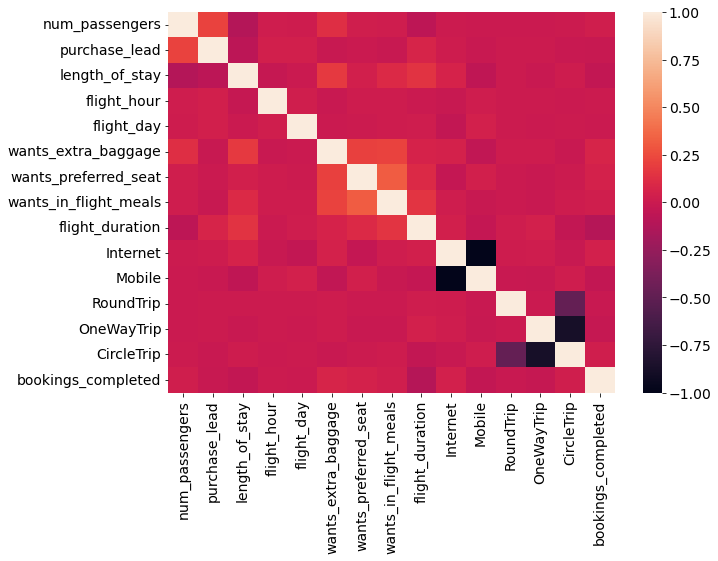

In [15]:
corr = scaled_df.corr()

plt.figure(figsize=(10,7))

#plot the heatmap
sns.heatmap(corr)

In [16]:
scaled_df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTrip,OneWayTrip,CircleTrip,bookings_completed
0,0.400699,1.964934,-0.119386,-0.381721,1.096773,0.703609,-0.649993,-0.863477,-1.174125,0.355746,-0.355746,-0.048226,-0.088327,0.100816,0
1,-0.579520,0.301163,-0.089878,-1.120714,1.096773,-1.421244,-0.649993,-0.863477,-1.174125,0.355746,-0.355746,-0.048226,-0.088327,0.100816,0
2,0.400699,1.754190,-0.030863,1.465761,-0.408660,0.703609,1.538479,-0.863477,-1.174125,0.355746,-0.355746,-0.048226,-0.088327,0.100816,0
3,-0.579520,0.123694,0.234707,-0.935966,1.096773,-1.421244,-0.649993,1.158109,-1.174125,0.355746,-0.355746,-0.048226,-0.088327,0.100816,0
4,0.400699,-0.186876,-0.030863,1.096264,-0.408660,0.703609,-0.649993,1.158109,-1.174125,0.355746,-0.355746,-0.048226,-0.088327,0.100816,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49987,0.400699,-0.641640,-0.502987,-0.012225,1.096773,0.703609,-0.649993,1.158109,-1.107318,0.355746,-0.355746,-0.048226,-0.088327,0.100816,0
49988,-0.579520,0.290071,-0.502987,-0.935966,1.598584,-1.421244,-0.649993,-0.863477,-1.107318,0.355746,-0.355746,-0.048226,-0.088327,0.100816,0
49989,-0.579520,-0.674916,-0.502987,2.389502,1.096773,-1.421244,-0.649993,1.158109,-1.107318,0.355746,-0.355746,-0.048226,-0.088327,0.100816,0
49990,-0.579520,-0.774742,-0.502987,0.357271,-1.412282,0.703609,-0.649993,1.158109,-1.107318,0.355746,-0.355746,-0.048226,-0.088327,0.100816,0


Now let's split the dataset into train and test sets.

## Splitting Train and Test Data

In [17]:
from sklearn.model_selection import train_test_split

X = scaled_df.iloc[:,:-1]
y = scaled_df['bookings_completed'] #using bookings_completed column for data spliting

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [18]:
#!pip install yellowbrick
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance

from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

# Random Forest Classifier

In [19]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

In [20]:
def model_fit_predict(model, X, y, X_predict): #creating a 
    model.fit(X, y)
    return model.predict(X_predict)

### Checking Training accuracy

In [21]:
y_pred_train = model_fit_predict(clf_rf, X_train, y_train, X_train)
set(y_pred_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     33994
           1       1.00      0.57      0.73      5999

    accuracy                           0.94     39993
   macro avg       0.96      0.79      0.84     39993
weighted avg       0.94      0.94      0.93     39993



0.9354387017728102

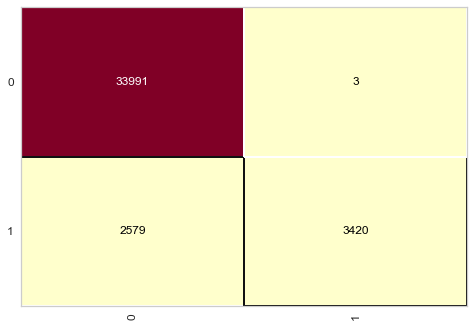

In [22]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)
cm.score(X_train, y_train)


# The Training Dataset accuracy is 93%

### Checking Testing accuracy

In [23]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8522
           1       0.44      0.04      0.07      1477

    accuracy                           0.85      9999
   macro avg       0.65      0.51      0.49      9999
weighted avg       0.79      0.85      0.79      9999



0.8507850785078508

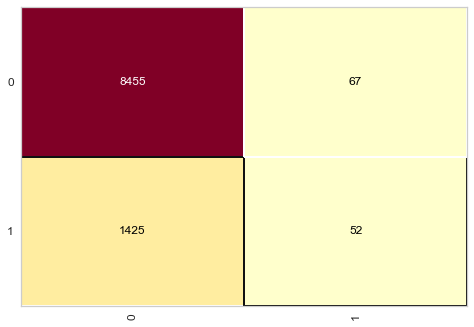

In [24]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)


# The Testing Dataset accuracy is 85%

Text(0.5, 0, 'Random Forest Feature Importance')

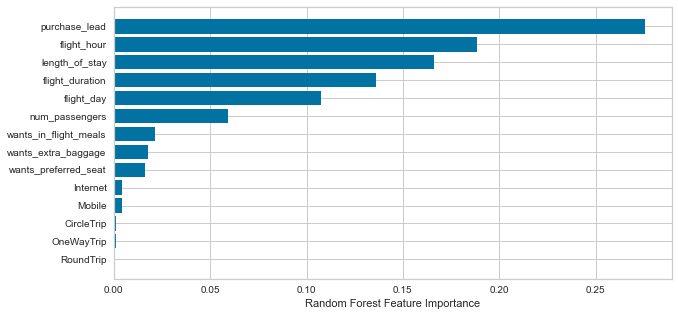

In [25]:
plt.figure(figsize=(10,5))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

### Using RandomForest Classifier, the features important are:
1. purchase_lead
2. flight_hour
3. lenght_of_stay
4. flight_duration
5. flight_day
6. num_passengers


Country that had maximum booking applications is Australia
Country that had their maximum booking completed is Malaysia 